In [34]:
import numpy as np

In [81]:
#Question 1
#输入a,b,c
a,b,c = (input("请输入a,b,c的值(如:1 5 10)：").split())
a= float(a)
b= float(b)
c= float(c)
print('调换前：a=',a,'b=',b,'c=',c)
#根据a,b,c的大小调换值，最大的给a，最小的给c
if a>b:
    if b<c:
        if a>c:
            d=c;
            c=b;
            b=d;
        else:
            d=c;
            c=b;
            b=a;
            a=d;           
else:
    if b>c:
        if a>c:
            d=b;
            b=a;
            a=d;
        else:
            d=a;
            a=b;
            b=c;
            c=d;
    else:
        d=a;
        a=c;
        c=d;
#求解a+b-10*c
print('调换后：a=',a,'b=',b,'c=',c)
print("Solution=",a+b-10*c)

请输入a,b,c的值(如:1 5 10)：1 6 3
调换前：a= 1.0 b= 6.0 c= 3.0
调换后：a= 6.0 b= 3.0 c= 1.0
Solution= -1.0


In [11]:
#Question 2
import math
import numpy as np

def cel(x):
    if x>1:
        g=np.zeros(x)
        for i in range(1,x):
            g[0]=1;
            g[i]=g[math.ceil((i+1)/3)-1]+2*(i+1);
        s=g[x-1];
    else:
        s=x
    return int(s)

f=[];

#输入为1，2，3，... , 9, 10，10个正整数
print("List:",range(1,11))
#循环调用函数，生成函数值
for i in range(1,11):
    b=cel(i);
    f.append(b);
print('对应1:10的函数值为(当然也可以输入单个值，返回单个值)：',f);    

List: range(1, 11)
对应1:10的函数值为(当然也可以输入单个值，返回单个值)： [1, 5, 7, 13, 15, 17, 21, 23, 25, 33]


In [13]:
#Question 3_1
#思路:先利用广播机制快速生成包含所有结果的数组（包含元素个数:6^10），遍历数组，找相同结果的个数
#（占用较多时间）
import numpy as np
import math
def Find_number_of_ways(x):
    sum1=[];
    a = np.array([[1],[2],[3],[4],[5],[6]]);
    b = np.array([1,2,3,4,5,6]);
    c=a+b;                                       #利用广播机制求所有可能出现的情况，做成N*1数组
    c = c.reshape(36,1);                     
    for i in range(3,11):
        c=c+b;
        c = c.reshape(int(math.pow( 6, i)),1)
    for i in np.unique(c):                   
        sum1.append(np.sum(c==i))
    return sum1

x=input('The sum of values on each face when all the dice are thrown(10~60，eg. 24)=');
N=Find_number_of_ways(x);
print('N=',N[int(x)-10])

The sum of values on each face when all the dice are thrown(10~60，eg. 24)=35
N= 4395456


In [82]:
#Question 3_2
import numpy as np
import math
def Find_number_of_ways(x):
    sum1=[];
    a = np.array([[1],[2],[3],[4],[5],[6]])
    b = np.array([1,2,3,4,5,6])
    c=a+b;                             #利用numpy广播机制求所有可能出现的情况，快速生成N*1数组
    c = c.reshape(36,1)                        
    for i in range(3,11):
        c=c+b;
        c = c.reshape(int(math.pow( 6, i)),1)
    for i in np.unique(c):                   
        sum1.append(np.sum(c==i))
    N=sum1
    return N

Number_of_ways=Find_number_of_ways(x);
print('10-60出现的次数相应的列表=',Number_of_ways);
print('Maximum of Number_of_ways=', max(Number_of_ways));
b=np.where(np.array(Number_of_ways)==max(Number_of_ways));
print('The corresponding x=',int(b[0]+10));

10-60出现的次数相应的列表= [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
Maximum of Number_of_ways= 4395456
The corresponding x= 35


In [37]:
#Question 4_1
def Random_integer(N):
    arr=np.random.randint(0,11,N);
    return arr

N=int(input('Number of arrays n='));
arr1=Random_integer(N);
print('arr1=',arr1);

Number of arrays n=5
arr1= [ 1  9  4  5 10]


In [76]:
#Question 4_2
#由于array可以有重复值，所有下面函数考虑array元素含有重复值情况！！！
#统计子集个数时也会将重复子集去掉！！！
def Sum_averages(a): 
    #先对a按从小到大顺序排序，便于去重。
    a.sort();
    b=[];c=[];s=0;                #初始化
    for i in range(len(a)):       #思路为：
        c[:]=b[:];                #c储存前一步找到的所有子集；
        b.append([a[i]]);         #先在b中存入单元素的子集[a[i]]（只含自身）；
        for j in range(len(b)-1): #再在b中加入上一步子集c所有元素都加上a[i]后的值；
            c[j]=c[j]+[a[i]];     
            b.append(c[j]);       #把b存起来，再循环从而将所有子集都加入b
    #判断并去掉子集
    b.sort();
    last = b[-1];
    for i in range(len(b) - 2, -1, -1):
        if last == b[i]:
            del b[i]
        else:
            last = b[i]
    #print('子集个数=',len(b))
    #统计并返回所有子集均值的和
    sum_list=0;
    for i in range(len(b)):
        s=np.mean(b[i])
        sum_list=sum_list+s;
    return sum_list

a=input('Input a list(整数，可以有重复值，如：1 2 2 3)：')
a=a.split(' ')
a = [int(a[i]) for i in range(len(a))]
print('Sum_averages=',Sum_averages(a))

Input a list(整数，可以有重复值，如：1 2 2 3)：1 2 3 3
Sum_averages= 24.25


随机数组= [5]
子集均值和= 5.0
随机数组= [8, 3]
子集均值和= 16.5
随机数组= [6, 0, 8]
子集均值和= 32.66666666666667
随机数组= [9, 6, 6, 3]
子集均值和= 66.0
随机数组= [0, 5, 1, 10, 3]
子集均值和= 117.8
随机数组= [9, 2, 10, 9, 1, 0]
子集均值和= 237.84999999999997
随机数组= [5, 0, 4, 5, 9, 6, 0]
子集均值和= 299.12619047619046
随机数组= [0, 1, 8, 1, 7, 7, 8, 4]
子集均值和= 477.02380952380946
随机数组= [5, 6, 7, 0, 1, 8, 3, 5, 8]
子集均值和= 1359.326587301587
随机数组= [4, 9, 2, 5, 3, 3, 10, 3, 9, 5]
子集均值和= 1530.2345238095238
随机数组= [4, 8, 0, 8, 10, 1, 1, 2, 5, 9, 8]
子集均值和= 3879.231385281385
随机数组= [7, 4, 4, 0, 3, 5, 2, 2, 10, 4, 5, 3]
子集均值和= 3538.681890331891
随机数组= [6, 7, 5, 3, 8, 1, 4, 0, 6, 6, 9, 6, 1]
子集均值和= 9119.40122932623
随机数组= [0, 5, 3, 2, 4, 9, 6, 8, 10, 1, 10, 4, 7, 10]
子集均值和= 34360.80304695306
随机数组= [5, 0, 5, 7, 4, 10, 7, 2, 4, 10, 5, 8, 0, 10, 2]
子集均值和= 13592.48606116106
随机数组= [2, 2, 6, 0, 5, 9, 10, 1, 6, 2, 5, 6, 4, 10, 0, 3]
子集均值和= 30688.638579476083
随机数组= [9, 5, 6, 7, 7, 1, 3, 7, 0, 9, 5, 1, 7, 7, 0, 1, 10]
子集均值和= 25817.54009185259
随机数组= [10, 1, 2, 0, 1, 8, 7, 0,

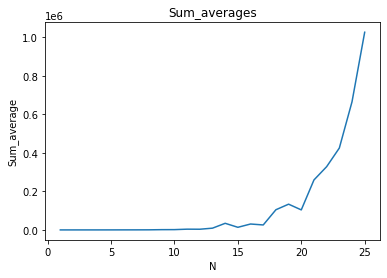

In [79]:
#Question 4_3
#调用4_1的函数，生成的元素有重复值，所以以下代码考虑重复，且去掉从复子集!
#由于当N增大子集个数几乎指数增长，且考虑重复子集需要多次遍历，所需计算时间较长，
#因此下图仅展示N=1~20的所有子集均值的和。
from matplotlib import pyplot as plt
Total_sum_averages=[];
for i in range(1,26):
    a=Random_integer(i);
    a=a.tolist();
    print('随机数组=',a);
    print('子集均值和=',Sum_averages(a));
    Total_sum_averages.append(Sum_averages(a))
    
print(Total_sum_averages)
x = [int(i) for i in range(1,26)]
plt.title("Sum_averages") 
plt.xlabel("N") 
plt.ylabel("Sum_average") 
plt.plot(x,Total_sum_averages) 
plt.show()
# describe what do you see
#从图中可以看出：
#（1）（虽然生成的随机数组的均值为5）随着数组元素个数的增加，子集个数快速增大，导致其子集均值和
#也快速增大，在（0-25范围内）几乎成指数增长趋势；
#（2）（0-25范围内）前半段增长满，后半段斜率快速增大；
#（3）曲线N=15-20范围处不光滑，可能由于不同N处，随机数组的值相差较大或重复值得数量相差较大引起。
#计算量在大于20后快速增大，电脑计算时间较长，因此仅计算到25。

In [ ]:
#Question 5_1
#import numpy as np
def Create_a_matrix(n,m):
    arr1 = np.random.randint(0,2,n*m).reshape(n, m); #生成n行，m列，元素为0或1（随机）的矩阵
    arr1[0,0]=1；      #将左上端值换为1
    arr1[-1,-1]=1；    #将右下端值换为1
    return arr1
n = int(input('The number of rows='));
m = int(input('The number of columns='));
Create_a_matrix(n,m)   #用输入的值调用函数

In [16]:
#Question 5_2
import numpy as np
#统计路径数的函数Count_path
def Count_path(M):
    #获取随机矩阵的行数、列数；
    (row,col)=M.shape;
    #在矩阵M外侧增加0，便于对M矩阵最外侧元素进行判断；
    m=np.zeros((row+2,col+2));
    for i in range(row):
        for j in range(col):
            m[i+1,j+1]=M[i,j];
    #print("外侧增加0后的矩阵=\n",m);
    (row,col)=m.shape;
    #建立矩阵sum，存储某一步仍能向下走的点的坐标（包含不同路径都通过某一点的重复坐标），并把上
    #一步已经走过的坐标换为[0,0]，最终统计能到达右下角的所有坐标，再统计不为[0,0]的坐标的个数
    sum=np.array([[1,1]]);
    for i in range(10000):
        if i >= len(sum):break;
        if int(sum[[i],[0]])+int(sum[[i],[1]])==(row+col-4):continue;
        if m[int(sum[[i],[0]])+1,int(sum[[i],[1]])]==1:
            sum=np.append(sum,[[int(sum[i,0])+1,int(sum[i,1])]],axis=0);
        if m[int(sum[[i],[0]]),int(sum[[i],[1]])+1]==1:
            sum=np.append(sum,[[int(sum[i,0]),int(sum[i,1])+1]],axis=0);
        sum[i]=[0,0];
        i=0;    
    s=0
    for i in range(len(sum)):
        if np.sum(sum[i])==0:
            s+=1;      
    return (len(sum)-s)
#输入随机矩阵的行数和列数，调用5_1函数生成矩阵
N = int(input('The number of rows='));
M = int(input('The number of columns='));
a=Create_a_matrix(N,M);
print("随机生成的矩阵为=\n",a)
Num=Count_path(a)
print('Number of ways = ',Num)

The number of rows=10
The number of columns=8
随机生成的矩阵为=
 [[1 0 1 1 0 1 1 1]
 [0 0 1 1 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 1 1]
 [1 1 0 1 0 1 1 1]
 [0 1 0 0 1 1 0 0]
 [0 0 1 0 0 0 0 1]
 [0 1 0 1 1 1 0 1]
 [1 1 0 0 1 0 0 0]
 [0 1 1 0 0 1 0 1]]
Number of ways =  0


In [88]:
#Question 5_3
#调用5_2函数1000次
s=0;
for i in range(1000):
    a=Create_a_matrix(10,8);
    s=s+Count_path(a);    
print('1000次路径的均值=',s/1000); #report mean = s/1000

1000次路径的均值= 0.36
